#1. Иерархический кластерный анализ

Аккуратова Дарья Александровна 337100

студент, 1-й курс, группа S41032, факультет ВШ ЦК 

Задание:

Определить число кластеров и обосновать свой выбор.
Разбить объекты на кластеры. Предложить и обосновать интерпретацию кластеров.

(из pdf: 
Вопросы:
Определить число кластеров.
Подобрать метод классификации, дающий наиболее ясные результаты.)

Данные для лабораторной работы выложены в архиве Задачи для лабораторной 1-3.zip. Слушатели, чья фамилия начинается на буквы А - К решают задачу из папки
задача_1_леденцы. Слушатели, чья фамилия начинается на буквы Л - Я решают задачу из папки задача_2_Economics of Cities. Любой желающий может вместо указанной выше задачи решать задачу из папки
задача_3_цифры.

Ответ:

Согласно решению определено 4 кластера, это хорошо видно на графиках каменистой осыпи и дендрограмме. Разделение на кластеры можно проследить с помощью сводной таблицы всех 4-х кластеров и их средних значений каждого из оценок высказываний.

Согласно объединению в кластеры видно, что в 1-й кластер (степень согласия у которых с высказываниями следующих пунктов были более ярко выражены: V9,V10,V11) вошли те респонденты, которые потребляют леденцы с целью замены лекарственного средства, во 2-й (V1,V2,V3,V4) - с целью улучшить запах и вкус во рту, в 3-й (V7,V8) - с целью переключиться на мыслительный процесс, а в 4-й (V5,V6) можно отнести потребителей-сладкоежек, которые употребляют леденцы с целью получить вкусовое удовольствие.

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [2]:
df = pd.read_csv("Л•§•≠жл.dat", sep=";")

In [3]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,4,5,5,5,3,3,3,3,3,3,3
1,5,4,5,5,3,3,3,3,3,3,3
2,5,5,4,5,3,3,3,3,3,3,3
3,5,4,5,5,3,3,3,3,3,3,3
4,4,5,5,5,3,3,3,3,3,3,3


In [4]:
df.shape

(338, 11)

In [5]:
# Применим алгоритм иерархической кластеризации и построим дендрограмму

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

link = linkage(df, 'ward', 'euclidean') # объект, в котором будет хранится информация о последовательном слиянии кластеров
# ward - метод вычисления расстояний между кластерами, euclidean - метрика

Объект ```link``` представляет собой матрицу ```(n-1) x 4```, где ```n``` -- число наблюдений. Каждая строка матрицы представляет собой результат слияния очередной пары кластеров с номерами ```link[i, 0]``` и ```link[i, 1]```. Новому кластеру присваивается номер ```n + i```. ```link[i, 2]``` содержит расстояние между объединяемыми кластерами, а ```link[i, 3]``` -- размер нового кластера.

In [6]:
print(type(link))
print(link.shape)

<class 'numpy.ndarray'>
(337, 4)


In [7]:
link

array([[  0.        ,   4.        ,   0.        ,   2.        ],
       [  1.        ,   3.        ,   0.        ,   2.        ],
       [  2.        ,   6.        ,   0.        ,   2.        ],
       ...,
       [664.        , 669.        ,  30.21829021, 120.        ],
       [667.        , 672.        ,  43.44161878, 230.        ],
       [671.        , 673.        ,  51.70554708, 338.        ]])

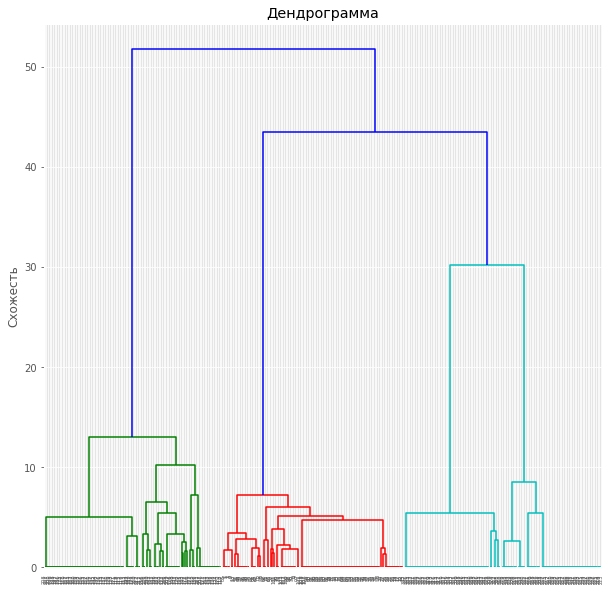

In [8]:
# Применим функцию для построения дендрограммы
# Пороговое значение определяется как 0.7*max(Z[:,2])

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
ax1.set_ylabel('Схожесть')
ax1.set_title('Дендрограмма')

dn = dendrogram(link)

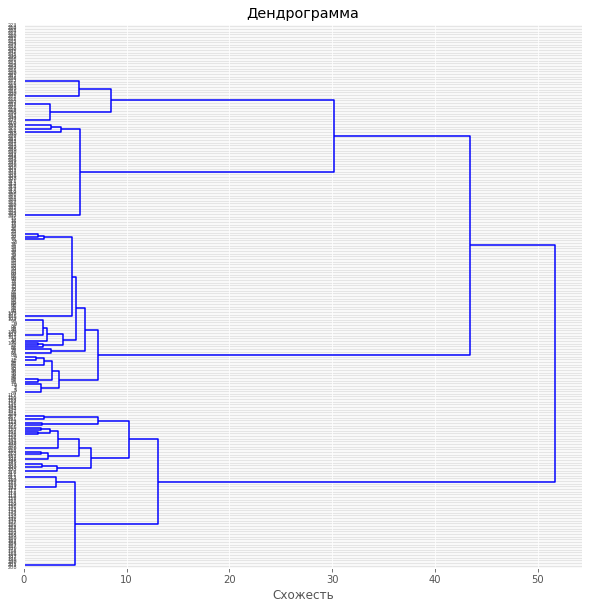

In [9]:
# Применим другую функцию для построения дендрограммы, где уберем автоматическое определение числа кластеров

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Схожесть')
ax1.set_title('Дендрограмма')

dn = dendrogram(link, color_threshold = -1,
                orientation = "right")

In [10]:
# На дендрограмме видно, что число кластеров равно 4
# Интерпретируем данные

df['cluster'] = fcluster(link, 14, criterion='distance') # distance - для остановки разбиения по расстоянию между кластерами
df.groupby('cluster').mean() # вычислим средние значения всех характеристик, сгруппировав данные по номеру кластера

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
cluster,,,,,,,,,,,
1,2.824074,2.833333,2.768519,2.620370,2.611111,2.583333,2.750000,2.916667,4.953704,4.814815,4.861111
2,4.845455,4.800000,4.836364,4.681818,3.036364,3.036364,3.000000,2.990909,3.072727,3.045455,3.045455
3,3.000000,2.966102,2.966102,2.915254,2.915254,2.949153,4.915254,4.915254,3.000000,3.000000,3.000000
4,3.000000,3.000000,3.000000,3.000000,4.852459,4.852459,3.000000,2.918033,2.754098,2.754098,2.754098


In [11]:
df['cluster'] = fcluster(link, 4, criterion='maxclust') # maxclust - для разбиения по заданному числу кластеров
df.groupby('cluster').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
cluster,,,,,,,,,,,
1,2.824074,2.833333,2.768519,2.620370,2.611111,2.583333,2.750000,2.916667,4.953704,4.814815,4.861111
2,4.845455,4.800000,4.836364,4.681818,3.036364,3.036364,3.000000,2.990909,3.072727,3.045455,3.045455
3,3.000000,2.966102,2.966102,2.915254,2.915254,2.949153,4.915254,4.915254,3.000000,3.000000,3.000000
4,3.000000,3.000000,3.000000,3.000000,4.852459,4.852459,3.000000,2.918033,2.754098,2.754098,2.754098


In [12]:
df.groupby('cluster').size() # сколько наблюдений попало в каждый кластер

cluster
1    108
2    110
3     59
4     61
dtype: int64

In [13]:
# Ввиду того, что данных достаточно много, используем автоматический подбор кластеров - график каменистой осыпи. 
# В матрице link во второй колонке хранятся расстояния между парами слитых кластеров. По построению, строки матрицы упорядочены по этой колонке

dist = link[:, 2]
dist

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [14]:
dist.shape

(337,)

Text(0, 0.5, 'Расстояние')

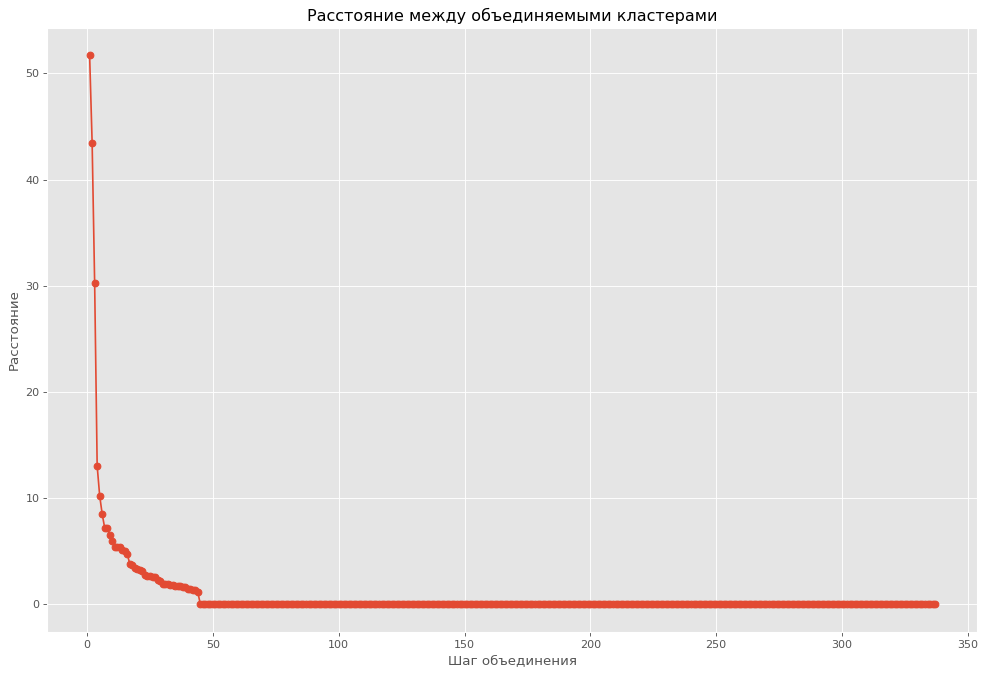

In [15]:
# Построим график зависимости расстояний между кластерами от шага слияния (обратного) - каменистую осыпь (локоть)

plt.figure(figsize=(15, 10), dpi=80)

dist_rev = dist[::-1]
idxs = range(1, len(dist) + 1)
plt.plot(idxs, dist_rev, marker='o')
plt.title('Расстояние между объединяемыми кластерами')
plt.xlabel('Шаг объединения')
plt.ylabel('Расстояние')

In [16]:
dist = link[290:330, 2] # ввиду того, что этот способ всё ещё немасштабируем для больших данных, поправим данные, включая в график не все подряд слияния, а только несколько последних
dist

array([0.        , 0.        , 0.        , 1.15470054, 1.34164079,
       1.35873244, 1.41421356, 1.41421356, 1.63299316, 1.63299316,
       1.69030851, 1.73205081, 1.73205081, 1.82574186, 1.82574186,
       1.93009708, 1.93649167, 1.95180015, 2.22111083, 2.30940108,
       2.5560386 , 2.5819889 , 2.68328157, 2.68328157, 2.76502769,
       3.09838668, 3.27326835, 3.34664011, 3.399209  , 3.6566964 ,
       3.765339  , 4.70224533, 5.02468483, 5.115595  , 5.38112644,
       5.38178747, 5.4279342 , 5.97927803, 6.55149433, 7.17827943])

Text(25, 5.5, '4 кластера')

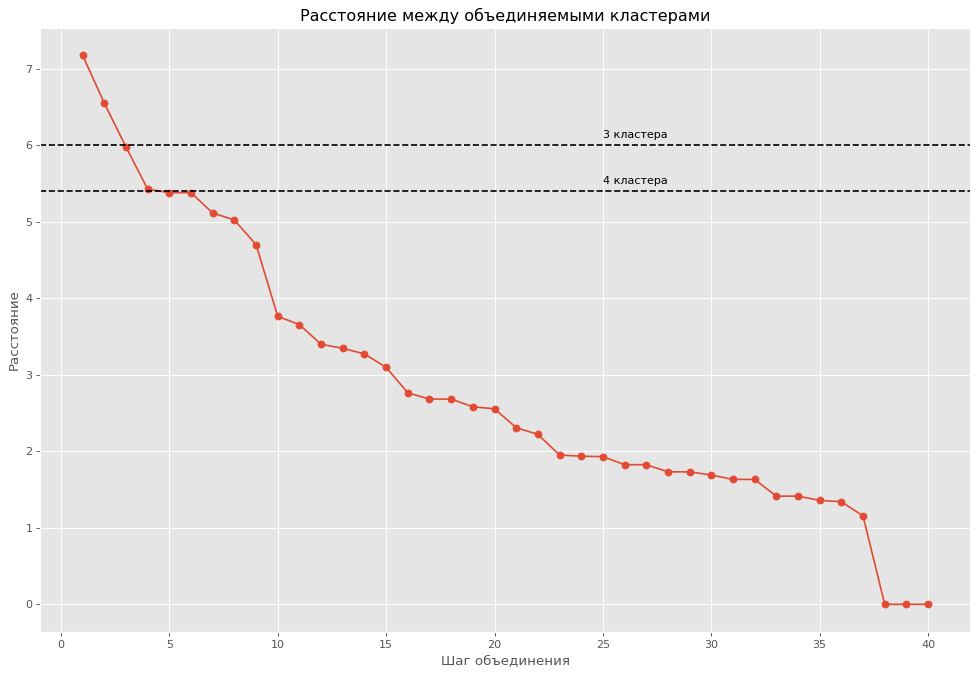

In [17]:
# Построим график зависимости расстояний между кластерами от шага слияния (обратного)

plt.figure(figsize=(15, 10), dpi=80)

dist_rev = dist[::-1]
idxs = range(1, len(dist) + 1)
plt.plot(idxs, dist_rev, marker='o')
plt.title('Расстояние между объединяемыми кластерами')
plt.xlabel('Шаг объединения')
plt.ylabel('Расстояние')
plt.axhline(6, c='k', linestyle='dashed')
plt.axhline(5.4, c='k', linestyle='dashed')
plt.text(25, 6.1, '3 кластера')
plt.text(25, 5.5, '4 кластера')